## PROJETO MENTORIA DSA - 2021 #
## PROBLEMA:  Prever quando um país estará com a pandemia sob controle.
 
## Dataset desenvolvido a partir de informações de: 
https://github.com/CSSEGISandData/COVID-19


Neste notebook, iremos apenas tratar uma localidade para entendimento da correlação das variáveis com a variável target

In [172]:
import pandas as pd

In [173]:
dataset = pd.read_csv('dataset/owid-covid-data-26-06-2021.csv', sep=',', header=0)
dataset.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [174]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.477500e+04,94772.000000,93762.000000,8.468500e+04,84841.000000,93762.000000,94270.000000,94267.000000,93262.000000,84193.000000,...,59538.000000,88222.000000,90452.000000,69013.000000,68004.000000,44328.000000,80377.000000,93273.000000,88368.000000,3463.000000
mean,1.040674e+06,6044.209682,6071.178116,2.828512e+04,146.934065,132.103936,12813.407304,76.126470,76.408417,284.402427,...,13.400685,258.413930,7.921591,10.562455,32.690520,50.839871,3.028012,73.236288,0.727418,18.259939
std,7.139992e+06,37866.216616,37617.047442,1.687084e+05,803.712713,746.114443,23671.436137,200.149082,158.864582,515.827853,...,19.958188,119.007582,4.138841,10.460222,13.483733,31.759405,2.459285,7.560131,0.150374,36.111776
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.224000e+03,2.000000,7.429000,5.300000e+01,0.000000,0.000000,255.129500,0.211000,1.281250,7.890000,...,0.600000,167.295000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.365000
50%,1.330800e+04,73.000000,91.429000,3.780000e+02,2.000000,1.429000,1752.937000,8.342000,10.995000,50.844000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000,7.340000
75%,1.414915e+05,803.250000,846.499750,3.687000e+03,18.000000,14.429000,13252.876750,70.261000,78.701250,309.667000,...,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.875000
max,1.804101e+08,906008.000000,826389.571000,3.909437e+06,18050.000000,14737.000000,179667.379000,18293.675000,4083.500000,5806.378000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,409.690000


In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98229 entries, 0 to 98228
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               98229 non-null  object 
 1   continent                              93614 non-null  object 
 2   location                               98229 non-null  object 
 3   date                                   98229 non-null  object 
 4   total_cases                            94775 non-null  float64
 5   new_cases                              94772 non-null  float64
 6   new_cases_smoothed                     93762 non-null  float64
 7   total_deaths                           84685 non-null  float64
 8   new_deaths                             84841 non-null  float64
 9   new_deaths_smoothed                    93762 non-null  float64
 10  total_cases_per_million                94270 non-null  float64
 11  ne

In [176]:
dataset.tests_units.unique()
dataset.drop(columns=['tests_units'], inplace=True)

In [177]:
dataset.drop(columns=['iso_code', 'continent'], inplace=True)

In [178]:
dataset.head(5)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [179]:
dataset.groupby(by=['location']).count().sort_values(by='total_cases', ascending=False)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
location,,,,,,,,,,,,,,,,,,,,,
North America,521,521,521,515,483,521,515,521,521,515,...,0,0,0,0,0,0,0,0,0,0
Taiwan,527,521,520,515,496,496,515,521,520,515,...,0,527,0,0,0,0,0,527,0,50
World,521,521,521,515,521,521,515,521,521,515,...,521,521,521,521,521,521,521,521,521,0
South Korea,522,521,520,515,492,492,515,521,520,515,...,522,522,522,522,522,0,522,522,522,67
United States,521,521,520,515,483,483,515,521,520,515,...,521,521,521,521,521,0,521,521,521,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bermuda,167,0,0,0,0,0,0,0,0,0,...,0,167,167,0,0,0,0,167,0,0
Curacao,89,0,0,0,0,0,0,0,0,0,...,0,0,89,0,0,0,0,89,0,0
Aruba,88,0,0,0,0,0,0,0,0,0,...,0,0,88,0,0,0,0,88,0,0


In [180]:
dataset_world = dataset[dataset['location'] == 'World']
dataset_world.head(5)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
96338,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.071,0.000,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
96339,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,0.084,0.013,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
96340,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,0.121,0.037,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
96341,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,0.184,0.063,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
96342,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,0.272,0.088,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN


In [181]:
dataset_world.reset_index(inplace=True)

In [182]:
dataset_world.describe()

,index,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,521.000000,5.210000e+02,521.000000,515.000000,5.210000e+02,521.000000,515.000000,521.000000,521.000000,515.000000,...,521.0,5.210000e+02,5.210000e+02,5.210000e+02,5.210000e+02,5.210000e+02,5.210000e+02,5.210000e+02,5.210000e+02,0.0
mean,96598.000000,5.948212e+07,345364.616123,347100.023303,1.436745e+06,7503.685221,7540.251049,7631.001386,44.307077,44.529683,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN
std,150.544013,5.822868e+07,244466.321147,238924.183174,1.205802e+06,4306.004738,3966.017191,7470.196679,31.362746,30.651759,...,0.0,3.072495e-12,1.137961e-13,6.401031e-14,2.844902e-14,2.987148e-13,7.112256e-15,9.672668e-13,5.223063e-15,NaN
min,96338.000000,5.570000e+02,0.000000,717.286000,1.700000e+01,0.000000,16.286000,0.071000,0.000000,0.092000,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN
25%,96468.000000,6.188259e+06,114251.000000,118676.928500,3.912710e+05,5011.000000,5281.071500,793.896000,14.657000,15.225000,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN
50%,96598.000000,3.656129e+07,308519.000000,332607.429000,1.113157e+06,6723.000000,6371.714000,4690.473000,39.580000,42.670000,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN
75%,96728.000000,1.092293e+08,534136.000000,572384.142500,2.479755e+06,10504.000000,10825.357000,14013.107000,68.525000,73.431500,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN
max,96858.000000,1.804101e+08,906008.000000,826389.571000,3.909437e+06,18050.000000,14737.000000,23144.931000,116.232000,106.018000,...,10.0,2.330700e+02,8.510000e+00,6.434000e+00,3.463500e+01,6.013000e+01,2.705000e+00,7.258000e+01,7.370000e-01,NaN


In [183]:
dataset_world['excess_mortality'].unique()

array([nan])

In [184]:
dataset_world.drop(columns=['excess_mortality'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [185]:
dataset_world

,index,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,96338,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.071,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
1,96339,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,0.084,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
2,96340,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,0.121,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
3,96341,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,0.184,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
4,96342,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,0.272,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,96854,World,2021-06-21,178786159.0,297395.0,359093.571,3873255.0,7076.0,8723.429,22936.597,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
517,96855,World,2021-06-22,179158296.0,372137.0,359184.571,3882237.0,8982.0,8498.857,22984.339,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
518,96856,World,2021-06-23,179595551.0,437255.0,364715.429,3891760.0,9523.0,8382.714,23040.435,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
519,96857,World,2021-06-24,179999388.0,403837.0,366334.714,3900372.0,8612.0,8289.571,23092.243,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [186]:
dataset_world.isna().sum()

index                                      0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         6
total_deaths                               0
new_deaths                                 0
new_deaths_smoothed                        6
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             6
total_deaths_per_million                   0
new_deaths_per_million                     0
new_deaths_smoothed_per_million            6
reproduction_rate                          4
icu_patients                             521
icu_patients_per_million                 521
hosp_patients                            521
hosp_patients_per_million                521
weekly_icu_admissions                    521
weekly_icu_admissions_per_million        521
weekly_hos

In [187]:
# Variáveis com maior indice de valores NA
columns_to_drop = ['icu_patients'
                    ,'icu_patients_per_million'
                    ,'hosp_patients'
                    ,'hosp_patients_per_million'
                    ,'weekly_icu_admissions'
                    ,'weekly_icu_admissions_per_million'
                    ,'weekly_hosp_admissions'
                    ,'weekly_hosp_admissions_per_million'
                    ,'new_tests'
                    ,'total_tests'
                    ,'total_tests_per_thousand'
                    ,'new_tests_per_thousand'
                    ,'new_tests_smoothed'
                    ,'new_tests_smoothed_per_thousand'
                    ,'positive_rate'
                    ,'tests_per_case'
                    ,'total_vaccinations'
                    ,'people_vaccinated'
                    ,'people_fully_vaccinated'
                    ,'new_vaccinations'
                    ,'new_vaccinations_smoothed'
                    ,'total_vaccinations_per_hundred'
                    ,'people_vaccinated_per_hundred'
                    ,'people_fully_vaccinated_per_hundred'
                    ,'new_vaccinations_smoothed_per_million'
                    ,'stringency_index'
                    ,'population'
                    ,'extreme_poverty']

dataset_world.drop(columns=columns_to_drop, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [188]:
dataset_world.head(20)

,index,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,96338,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.071,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
1,96339,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,0.084,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
2,96340,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,0.121,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
3,96341,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,0.184,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
4,96342,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,0.272,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
5,96343,World,2020-01-27,2927.0,809.0,NaN,82.0,26.0,NaN,0.376,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
6,96344,World,2020-01-28,5578.0,2651.0,717.286,131.0,49.0,16.286,0.716,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
7,96345,World,2020-01-29,6167.0,589.0,801.429,133.0,2.0,16.571,0.791,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
8,96346,World,2020-01-30,8235.0,2068.0,1082.857,171.0,38.0,21.857,1.056,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
9,96347,World,2020-01-31,9927.0,1692.0,1283.714,213.0,42.0,26.714,1.274,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [189]:
dataset_world.loc[dataset_world[['new_cases_smoothed']].isna()['new_cases_smoothed'].tolist(), 'new_cases_smoothed'] = 0
dataset_world.loc[dataset_world[['new_deaths_smoothed']].isna()['new_deaths_smoothed'].tolist(), 'new_deaths_smoothed'] = 0
dataset_world.loc[dataset_world[['new_cases_smoothed_per_million']].isna()['new_cases_smoothed_per_million'].tolist(), 'new_cases_smoothed_per_million'] = 0
dataset_world.loc[dataset_world[['new_deaths_smoothed_per_million']].isna()['new_deaths_smoothed_per_million'].tolist(), 'new_deaths_smoothed_per_million'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [190]:
print(dataset_world[['new_cases_smoothed']].isna().sum())
print(dataset_world[['new_deaths_smoothed']].isna().sum())
print(dataset_world[['new_cases_smoothed_per_million']].isna().sum())
print(dataset_world[['new_deaths_smoothed_per_million']].isna().sum())

new_cases_smoothed    0
dtype: int64
new_deaths_smoothed    0
dtype: int64
new_cases_smoothed_per_million    0
dtype: int64
new_deaths_smoothed_per_million    0
dtype: int64


In [191]:
dataset_world.dropna(axis=0, inplace=True)

<ipython-input-191-7640c7046add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_world.dropna(axis=0, inplace=True)


In [192]:
dataset_world.isna().sum()

index                              0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
handwashing_facilities             0
hospital_beds_per_thousand         0
l

In [193]:
dataset_world.shape

(517, 29)

In [194]:
dataset_world.drop(columns=['index'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [195]:
dataset_world

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
1,World,2020-01-23,655.0,98.0,0.000,18.0,1.0,0.000,0.084,0.013,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
2,World,2020-01-24,941.0,286.0,0.000,26.0,8.0,0.000,0.121,0.037,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
3,World,2020-01-25,1433.0,492.0,0.000,42.0,16.0,0.000,0.184,0.063,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
4,World,2020-01-26,2118.0,685.0,0.000,56.0,14.0,0.000,0.272,0.088,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
5,World,2020-01-27,2927.0,809.0,0.000,82.0,26.0,0.000,0.376,0.104,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,World,2021-06-18,177840993.0,405948.0,364546.714,3851553.0,9208.0,9449.429,22815.341,52.079,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
514,World,2021-06-19,178188440.0,347447.0,361053.000,3859623.0,8070.0,9208.571,22859.915,44.574,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
515,World,2021-06-20,178488764.0,300324.0,360682.714,3866179.0,6556.0,8838.429,22898.444,38.529,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
516,World,2021-06-21,178786159.0,297395.0,359093.571,3873255.0,7076.0,8723.429,22936.597,38.153,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [196]:
dataset_world.loc[:,'date']

1      2020-01-23
2      2020-01-24
3      2020-01-25
4      2020-01-26
5      2020-01-27
          ...    
513    2021-06-18
514    2021-06-19
515    2021-06-20
516    2021-06-21
517    2021-06-22
Name: date, Length: 517, dtype: object

In [197]:
# Validação de valor negativo
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
(dataset_world.select_dtypes(include=numerics).values < 0 ).any()

False

In [198]:
# Vamos tratar variável target
dataset_world['reproduction_rate'].sort_values().unique()

array([0.57, 0.59, 0.63, 0.66, 0.69, 0.74, 0.78, 0.82, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
       1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
       1.2 , 1.21, 1.22, 1.24, 1.26, 1.28, 1.29, 1.34, 1.35, 1.41, 1.42,
       1.44, 1.47, 1.48, 1.49, 1.54, 1.55, 1.58, 1.59, 1.64, 1.65, 1.7 ,
       1.71, 1.77, 1.78, 1.84, 1.85, 1.89, 1.93, 1.94, 1.99, 2.  , 2.02,
       2.06, 2.08, 2.09, 2.1 , 2.11, 2.12, 2.35, 2.57, 2.67, 2.81, 3.02,
       3.12, 3.23, 3.29, 3.45, 3.51, 3.54, 3.56])

In [199]:
# Antes, será criado um dataset auxiliar para manter apenas as variáveis numéricas
# Removendo colunas que não serão utilizadas para o modelo
dataset_world_treino = dataset_world
dataset_world_treino.drop(columns=['location', 'date'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [200]:
dataset_world_treino.dtypes

total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
reproduction_rate                  float64
population_density                 float64
median_age                         float64
aged_65_older                      float64
aged_70_older                      float64
gdp_per_capita                     float64
cardiovasc_death_rate              float64
diabetes_prevalence                float64
female_smokers                     float64
male_smokers                       float64
handwashing_facilities             float64
hospital_be

In [201]:
# Vamos separar a variável target e as variáveis preditoras

#Será necessário aplicar normalização na variável target
var_target = dataset_world_treino.loc[:, dataset_world_treino.columns == 'reproduction_rate']

var_predict = dataset_world_treino.loc[:, dataset_world_treino.columns != 'reproduction_rate']

In [202]:
var_target

,reproduction_rate
1,3.12
2,3.29
3,3.45
4,3.51
5,3.56
...,...
513,0.93
514,0.93
515,0.94
516,0.94


In [203]:
var_predict

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
1,655.0,98.0,0.000,18.0,1.0,0.000,0.084,0.013,0.000,0.002,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
2,941.0,286.0,0.000,26.0,8.0,0.000,0.121,0.037,0.000,0.003,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
3,1433.0,492.0,0.000,42.0,16.0,0.000,0.184,0.063,0.000,0.005,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
4,2118.0,685.0,0.000,56.0,14.0,0.000,0.272,0.088,0.000,0.007,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
5,2927.0,809.0,0.000,82.0,26.0,0.000,0.376,0.104,0.000,0.011,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,177840993.0,405948.0,364546.714,3851553.0,9208.0,9449.429,22815.341,52.079,46.768,494.118,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
514,178188440.0,347447.0,361053.000,3859623.0,8070.0,9208.571,22859.915,44.574,46.320,495.154,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
515,178488764.0,300324.0,360682.714,3866179.0,6556.0,8838.429,22898.444,38.529,46.272,495.995,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
516,178786159.0,297395.0,359093.571,3873255.0,7076.0,8723.429,22936.597,38.153,46.068,496.903,...,5.355,15469.207,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [204]:
print(f"Min {var_target.min()}")
print(f"Max {var_target.max()}")

Min reproduction_rate    0.57
dtype: float64
Max reproduction_rate    3.56
dtype: float64


In [205]:
# Será transformada a variável target de variável contínua para categórica ordinal
# Os valores serão separados em: BAIXO, MEDIO, ALTO
# O range será definido como:
# - 0 à 1.18 será baixo
# - 1.19 à 2.36 será medio
# - 2.37 pra cima será alto

def fn_transforma_categoria(num):
    categoria = 'BAIXO'
    if num > 1.18 and num < 2.37:
        categoria = 'MEDIO'
    elif num > 2.36:
        categoria = 'ALTO'
    
    return categoria

var_target['reproduction_rate'] = var_target['reproduction_rate'].apply(fn_transforma_categoria)

<ipython-input-205-15efe5190762>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_target['reproduction_rate'] = var_target['reproduction_rate'].apply(fn_transforma_categoria)


In [206]:
var_target['reproduction_rate'] = var_target['reproduction_rate'].astype('category')


<ipython-input-206-eb8d37a20b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_target['reproduction_rate'] = var_target['reproduction_rate'].astype('category')


In [207]:
var_target['reproduction_rate'].dtypes

CategoricalDtype(categories=['ALTO', 'BAIXO', 'MEDIO'], ordered=False)

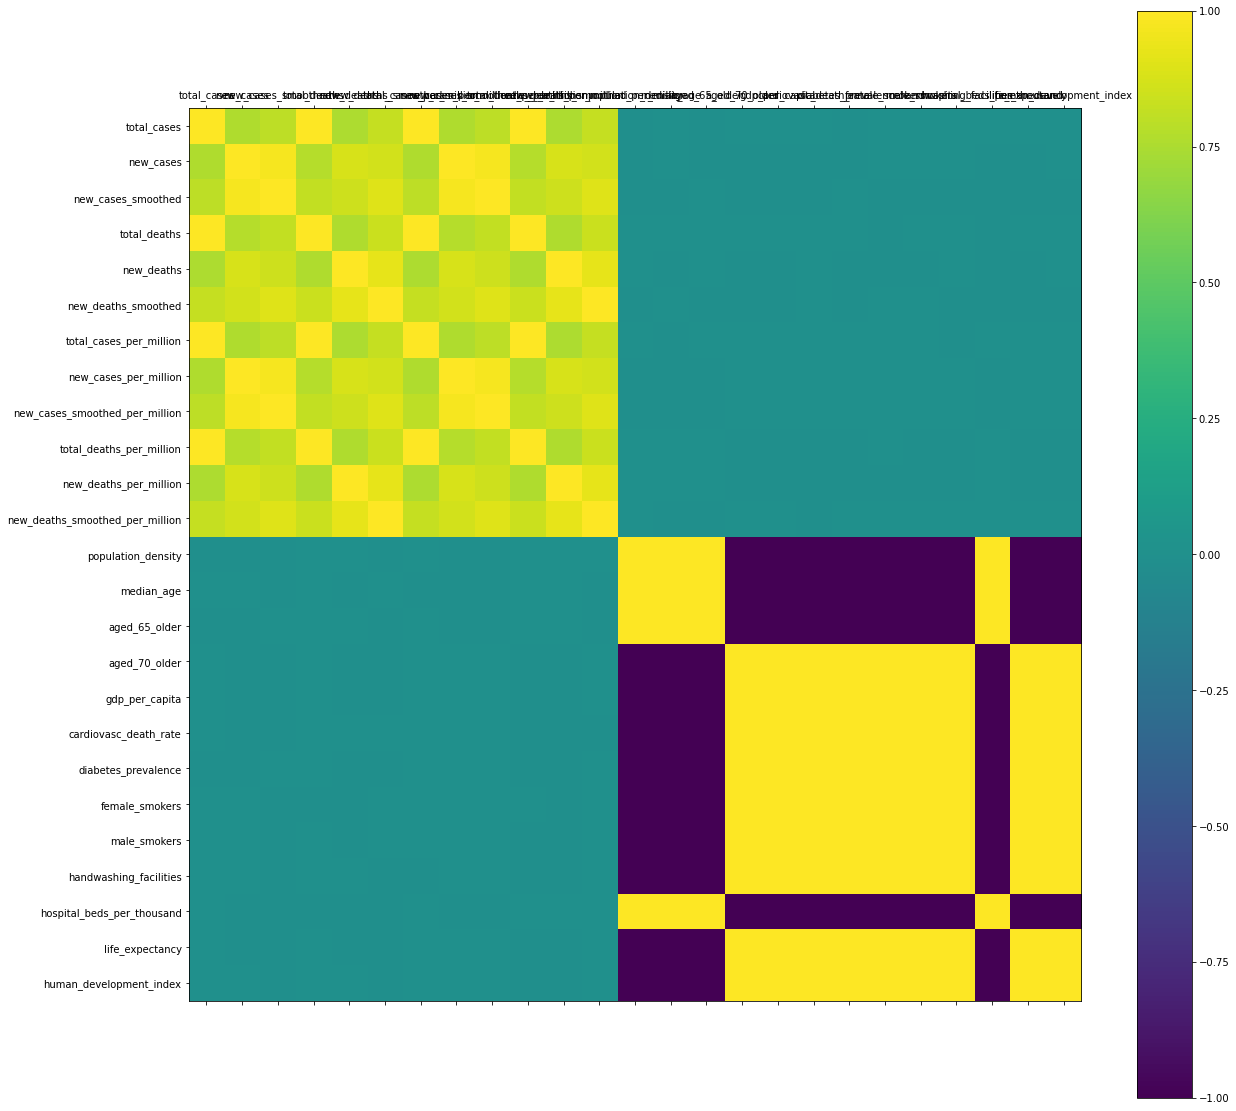

In [208]:
# Validando a correlação dos dados
import matplotlib.pyplot as plt
correlacao = var_predict.corr()
colunas = var_predict.columns.tolist()

# Plot
import numpy as np
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 25, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

In [209]:
# Conforme gráfico de correlação acima, iremos retirar as variáveis dos quadrantes que forma as partes 2,3,4
columns_to_drop = ['population_density', 
                   'median_age',
                   'aged_65_older',
                   'aged_70_older',
                   'gdp_per_capita',
                   'cardiovasc_death_rate',
                   'diabetes_prevalence',
                   'female_smokers',
                   'male_smokers',
                   'handwashing_facilities',
                   'hospital_beds_per_thousand',
                   'life_expectancy',
                   'human_development_index']

var_predict.drop(columns=columns_to_drop, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [210]:
var_predict.tail(5)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
513,177840993.0,405948.0,364546.714,3851553.0,9208.0,9449.429,22815.341,52.079,46.768,494.118,1.181,1.212
514,178188440.0,347447.0,361053.000,3859623.0,8070.0,9208.571,22859.915,44.574,46.320,495.154,1.035,1.181
515,178488764.0,300324.0,360682.714,3866179.0,6556.0,8838.429,22898.444,38.529,46.272,495.995,0.841,1.134
516,178786159.0,297395.0,359093.571,3873255.0,7076.0,8723.429,22936.597,38.153,46.068,496.903,0.908,1.119
517,179158296.0,372137.0,359184.571,3882237.0,8982.0,8498.857,22984.339,47.742,46.080,498.055,1.152,1.090


In [211]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

# Criação do modelo

modelo = ExtraTreesClassifier()
modelo.fit(var_predict.values, var_target.values[:])

# Print dos Resultados
print(var_predict.columns)
print(modelo.feature_importances_)

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million'],
      dtype='object')
[0.09756104 0.05766075 0.08749898 0.11847154 0.06125282 0.1050773
 0.09611541 0.0659938  0.08436843 0.09961805 0.04947192 0.07690996]


<ipython-input-211-ae6d83574dc5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(var_predict.values, var_target.values[:])


## Normalização
### Como os resultados do feature selecion, bem como da correlação ainda estão distantes de um ideal, 
### vamos aplicar a normalização em algumas variáveis

In [212]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from sklearn.preprocessing import MinMaxScaler

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))

var_predict.loc[:, var_predict.columns] = scaler.fit_transform(var_predict.loc[:, var_predict.columns])

# Sumarizando os dados transformados
var_predict.tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-212-0ee726f89ebb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_predict.loc[:, var_predict.columns] = scaler.fit_transform(var_predict.loc[:, var_predict.columns])


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
508,0.982170,0.334269,0.458655,0.979927,0.506732,0.734265,0.982170,0.334265,0.458658,0.979928,0.506477,0.734003
509,0.983892,0.340454,0.456445,0.981957,0.436589,0.732365,0.983892,0.340452,0.456441,0.981958,0.436528,0.732417
510,0.985966,0.409977,0.457254,0.984676,0.584686,0.734080,0.985966,0.409976,0.457253,0.984676,0.584629,0.734003
511,0.988191,0.439824,0.453632,0.987338,0.572608,0.732927,0.988191,0.439825,0.453631,0.987339,0.572539,0.732946
512,0.990381,0.433160,0.443778,0.989724,0.513214,0.667591,0.990381,0.433156,0.443783,0.989724,0.512953,0.667372
513,0.992647,0.448003,0.441132,0.992096,0.510111,0.641204,0.992647,0.447999,0.441133,0.992095,0.509931,0.640931
514,0.994587,0.383426,0.436904,0.994175,0.447061,0.624861,0.994587,0.383423,0.436907,0.994175,0.446891,0.624537
515,0.996263,0.331408,0.436456,0.995864,0.363178,0.599744,0.996263,0.331409,0.436454,0.995864,0.363126,0.599683
516,0.997923,0.328175,0.434533,0.997686,0.391988,0.591941,0.997923,0.328174,0.434530,0.997687,0.392055,0.591750
517,1.000000,0.410680,0.434643,1.000000,0.497590,0.576702,1.000000,0.410682,0.434643,1.000000,0.497409,0.576415


In [213]:
# Com os dados normalizados, vamos refazer a seleção de variável
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

# Criação do modelo
modelo = ExtraTreesClassifier()
modelo.fit(var_predict.values, var_target.values[:])

# Print dos Resultados
print(var_predict.columns)
print(modelo.feature_importances_)

<ipython-input-213-940a4dbb7dac>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(var_predict.values, var_target.values[:])


Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million'],
      dtype='object')
[0.08173708 0.05400968 0.08147979 0.11702523 0.04418945 0.0958599
 0.09940772 0.0609593  0.09984911 0.10089683 0.05474801 0.10983791]


In [217]:
## Vamos validar com um segundo método, utilizando PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Seleção de atributos
pca = PCA(n_components = 6)
fit = pca.fit(var_predict.values)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [8.74161285e-01 8.29171727e-02 2.92623682e-02 1.16509800e-02
 1.24100026e-03 7.67174936e-04]
[[ 0.32541356  0.27181549  0.29853323  0.31386297  0.23302525  0.27984814
   0.32541356  0.27181735  0.29853354  0.31386272  0.23297385  0.27979814]
 [ 0.40122251 -0.2872288  -0.25075896  0.35703918 -0.21455777 -0.1418763
   0.40122251 -0.28723085 -0.25075911  0.35703888 -0.21455773 -0.1418668 ]
 [-0.03234065 -0.29189892 -0.32786023 -0.03413701  0.41771705  0.36150821
  -0.03234065 -0.29190052 -0.32786129 -0.03413714  0.41759185  0.36141743]
 [-0.06194338 -0.25358039  0.22475444 -0.03845009 -0.40835732  0.4617163
  -0.06194338 -0.25358218  0.22475675 -0.03845016 -0.40825053  0.46165569]
 [ 0.20181439 -0.39787067  0.40086443 -0.2186457   0.21790851 -0.21219724
   0.20181439 -0.39787096  0.4008674  -0.21864671  0.21792913 -0.21197957]
 [-0.43302951 -0.18922175  0.17116269  0.47282486  0.10500064 -0.11319811
  -0.43302952 -0.18922111  0.17116156  0.4728248   0.10514431 -0.11290488]]
